In [73]:
from vega_datasets import data
from matplotlib import pyplot
import pandas as pd

In [3]:
temps = data.sf_temps()




    Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.


###    Resample by the day and take the average temperature. Visualize the average temperature over time.


In [6]:
temp_series = temps.set_index('date')

In [10]:
#Resampling with 'd' picks the [agg] of each day as the sampling point. 'Mean' is the aggregration made for
#each day.
daily_temp_avgs = temp_series.resample('d').agg('mean')

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


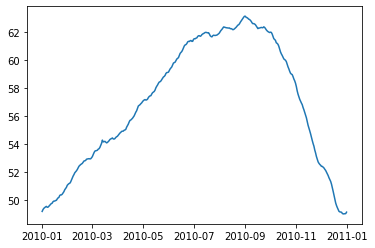

In [20]:
pyplot.plot(daily_temp_avgs)

###    Write the code necessary to visualize the minimum temperature over time.

In [24]:
daily_low_temps = temp_series.resample('d').agg('min')

In [23]:
#Making sure the first day is equal to what I found by resampling
temp_series['2010-01-01'].min()

temp    45.8
dtype: float64

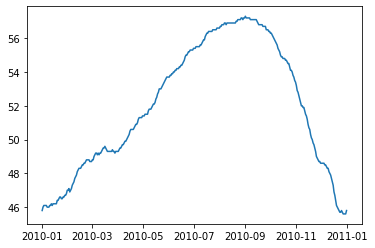

In [25]:
pyplot.plot(daily_low_temps)

###    Write the code necessary to visualize the maximum temperature over time.

In [26]:
daily_high_temps = temp_series.resample('d').agg('max')

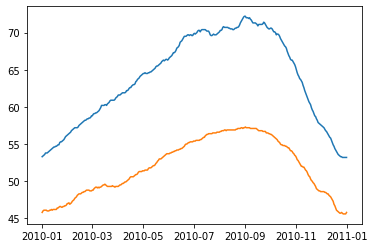

In [28]:
#Plotting the high and low in the Series
pyplot.plot(daily_high_temps)
pyplot.plot(daily_low_temps)

    Which month has the highest daily temperature variability?

Which month is the coldest, on average?

In [35]:
monthly_averages = temp_series.resample('m').agg('mean')

In [63]:
min_temp = float(monthly_averages.min())

In [64]:
type(min_temp)

float

In [65]:
monthly_averages[monthly_averages == min_temp]

,temp
date,
2010-01-31,49.98414
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


In [66]:
temp_series['2010-01'].mean()

temp    49.98414
dtype: float64

Which month has the highest average temperature?

In [67]:
max_temp = float(monthly_averages.max())

In [68]:
monthly_averages[monthly_averages == max_temp]

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,62.487083


###    Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). 
    
    Use this resampled dataframe to calculate the change in temperature for the day. 

In [70]:
mins = temp_series.resample('d').agg('min')

In [71]:
maxs = temp_series.resample('d').agg('max')

In [78]:
frame = {'Daily Low':mins.values,'Daily High': maxs.values}

In [85]:
df = pd.DataFrame(temp_series.resample('d').agg('mean'))

In [88]:
df['Daily High'] = maxs

In [89]:
df['Daily Low'] = mins

In [91]:
df['Daily Change'] = df['Daily High'] - df['Daily Low']

In [93]:
df.tail()

,temp,Daily High,Daily Low,Daily Change
date,,,,
2010-12-27,48.991667,53.2,45.6,7.6
2010-12-28,49.000000,53.2,45.6,7.6
2010-12-29,49.012500,53.2,45.6,7.6
2010-12-30,49.012500,53.2,45.6,7.6
2010-12-31,49.116667,53.2,45.8,7.4


###    Which month has the highest daily temperature variability?

In [99]:
(df['Daily Change'].resample('m').agg('mean'))

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: Daily Change, dtype: float64

### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

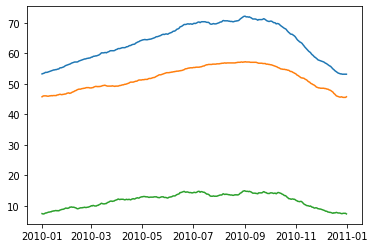

In [102]:
pyplot.plot(df['Daily High'])
pyplot.plot(df['Daily Low'])
pyplot.plot(df['Daily Change'])

# NEW DATASET

In [109]:
df = data.seattle_weather()

    Which year-month combination is the windiest?
    What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
    In which month does it rain the most?
    Which month has the most number of days with a non-zero amount of precipitation?


### Which year and month combination has the highest amount of precipitation?

In [112]:
#Forgot to change the index to a datetime index. Now we're cookin'
df = df.set_index('date')

In [120]:
monthly_rainfall = df.precipitation.resample('M').sum()

In [122]:
wettest_month = monthly_rainfall.max()

In [124]:
type(wettest_month)

numpy.float64

In [127]:
monthly_rainfall[monthly_rainfall == wettest_month]

date
2015-12-31    284.5
Freq: M, Name: precipitation, dtype: float64

###    Visualize the amount of monthly precipitation over time.

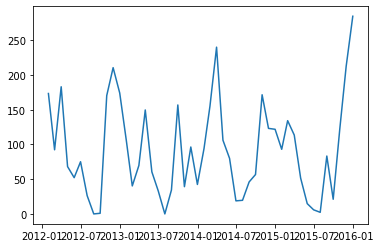

In [128]:
pyplot.plot(monthly_rainfall)

###    Visualize the amount of wind over time. Choose a time interval you think is appropriate.

In [130]:
df.wind.describe()

count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

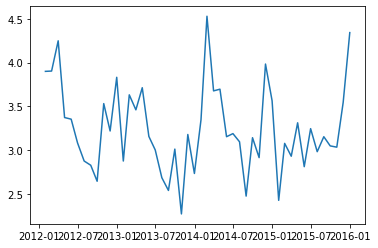

In [136]:
pyplot.plot(df.wind.resample('M').mean())

    Which year-month combination is the windiest?

In [140]:
df.wind.resample('M').mean().sort_values().tail()

date
2012-02-29    3.903448
2014-11-30    3.983333
2012-03-31    4.248387
2015-12-31    4.341935
2014-02-28    4.528571
Name: wind, dtype: float64